<a href="https://colab.research.google.com/github/andrewdge/CSE354-Final-Project/blob/main/CSE354_Final_Project_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Freeze all, paragraph-level
Random Test:
doc_precision: 0.4006 doc_recall: 0.3346, doc_f1: 0.3065

Fixed Test:
doc_precision: 0.6073 doc_recall: 0.3276, doc_f1: 0.2985

#Freezing all, document level
Random Test:
doc_precision: 0.3650 doc_recall: 0.3998 doc_f1: 0.3536

Fixed Test:
doc_precision: 0.3034 doc_recall: 0.3533 doc_f1: 0.2956

#All training, document level
Random Test: 
doc_precision: 0.3049 doc_recall: 0.3679 doc_f1: 0.2658

Fixed Test: 
doc_precision: 0.1981 doc_recall: 0.3415 doc_f1: 0.2266

#All training, paragraph level
Random Test:
doc_precision: 0.3854 doc_recall: 0.3729, doc_f1: 0.3624

Fixed Test:
doc_precision: 0.3515 doc_recall: 0.3398, doc_f1: 0.3150

#Top 2, document level
Random Test:
doc_precision: 0.3592 doc_recall: 0.4100 doc_f1: 0.3695

Fixed Test:
doc_precision: 0.3248 doc_recall: 0.3837 doc_f1: 0.3398

# Top 2, Paragraph level
Random Test:
doc_precision: 0.3128 doc_recall: 0.3108, doc_f1: 0.3036

Fixed Test:
doc_precision: 0.3698 doc_recall: 0.3517, doc_f1: 0.3211

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# data = {
#     'Freeze_Paragraph_Random': [0.4006, 0.3346, 0.3065],
#     'Freeze_Paragraph_Fixed': [0.6073, 0.3276, 0.2985],
#     'Freeze_Document_Random': [0.3650, 0.3998, 0.3536],
#     'Freeze_Document_Fixed': [0.3034, 0.3533, 0.2956],
#     'All_Paragraph_Random': [0.3854, 0.3729, 0.3624],
#     'All_Paragraph_Fixed': [0.3515, 0.3398, 0.3150],
#     'All_Document_Random': [0.3049, 0.3679, 0.2658],
#     'All_Document_Fixed': [0.1981, 0.3415, 0.2266],
#     'Top_2_Paragraph_Random': [0.3128, 0.3108, 0.3036],
#     'Top_2_Paragraph_Fixed': [0.3698, 0.3517, 0.3211],
#     'Top_2_Document_Random': [0.3592, 0.4100, 0.3695],
#     'Top_2_Document_Fixed': [0.3248, 0.3837, 0.3398],
# }
# df = pd.DataFrame.from_dict(data, orient='index', columns=['Precision', 'Recall', 'F1'])
# df
data = {
    'Freeze_Paragraph': {
        'Random': [0.4006, 0.3346, 0.3065],
        'Fixed': [0.6073, 0.3276, 0.2985],
    },
    'Freeze_Document': {
        'Random': [0.3650, 0.3998, 0.3536], 
        'Fixed': [0.3034, 0.3533, 0.2956],
    },
    'All_Paragraph': {
        'Random': [0.3854, 0.3729, 0.3624],
        'Fixed': [0.3515, 0.3398, 0.3150],
    },
    'All_Document': {
        'Random': [0.3049, 0.3679, 0.2658],
        'Fixed': [0.1981, 0.3415, 0.2266],
    },
    'Top_2_Paragraph': {
        'Random': [0.3128, 0.3108, 0.3036],
        'Fixed': [0.3698, 0.3517, 0.3211],
    },
    'Top_2_Document': {
        'Random': [0.3592, 0.4100, 0.3695],
        'Fixed': [0.3248, 0.3837, 0.3398]
    }, 
}
df = pd.DataFrame.from_dict({(i,j): data[i][j] 
                           for i in data.keys() 
                           for j in data[i].keys()})
df.index = ['precision', 'recall', 'f1']
df = df.T
df

precision  recall      f1
Freeze_Paragraph Random     0.4006  0.3346  0.3065
                 Fixed      0.6073  0.3276  0.2985
Freeze_Document  Random     0.3650  0.3998  0.3536
                 Fixed      0.3034  0.3533  0.2956
All_Paragraph    Random     0.3854  0.3729  0.3624
                 Fixed      0.3515  0.3398  0.3150
All_Document     Random     0.3049  0.3679  0.2658
                 Fixed      0.1981  0.3415  0.2266
Top_2_Paragraph  Random     0.3128  0.3108  0.3036
                 Fixed      0.3698  0.3517  0.3211
Top_2_Document   Random     0.3592  0.4100  0.3695
                 Fixed      0.3248  0.3837  0.3398

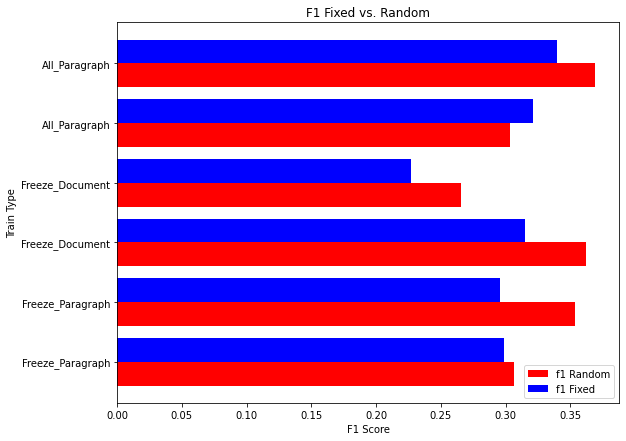

In [85]:
# X = ['Group A','Group B','Group C','Group D']
# Ygirls = [10,20,20,40]
# Zboys = [20,30,25,30]
  
# X_axis = np.arange(len(X))
  
# plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
# plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')

# indices = df.index.to_list()
# idxlabel = np.arange(len(indices))
# plt.barh(idxlabel - 0.2, df['f1'],  0.4, label='Precision', color='red')
# plt.barh(idxlabel + 0.2, df['Recall'],  0.4, label='Recall', color='blue')
  
# plt.yticks(idxlabel, indices)
# plt.xlabel("Type")
# plt.ylabel("Amount")
# plt.title("Title")
# plt.legend()
# plt.show()


# indices = df.index.to_list()
# idxlabel = np.arange(len(indices))
indices = df.index.to_list()
indices = [i[0] for i in indices]
idxlabel = np.arange(len(indices)/2)

random = df['f1'][::2].tolist()
fixed = df['f1'][1::2].tolist()

plt.figure(figsize=(9,7))
plt.barh(idxlabel - 0.2, random,  0.4, label='f1 Random', color='red')
plt.barh(idxlabel + 0.2, fixed,  0.4, label='f1 Fixed', color='blue')
  
plt.yticks(idxlabel, indices)
plt.xlabel("F1 Score")
plt.ylabel("Train Type")
plt.title("F1 Fixed vs. Random")
plt.legend()
plt.show()